### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs in as DataFrames

In [2]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb_data = Path("../Resources/fb_data.csv")
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr_data = Path("../Resources/twtr_data.csv")
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap_data = Path("../Resources/snap_data.csv")
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("../Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names to 'FB' 'TWTR', 'SNAP', and 'S&P 500'
combined_df.columns = ["FB", "TWTR", "SNAP", "S&P 500"]

# Display a few rows
combined_df.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,136.76,15.79,24.48,2381.919922
2017-03-03,137.17,15.75,27.09,2383.120117
2017-03-06,137.42,15.56,23.77,2375.310059
2017-03-07,137.30,15.18,21.44,2368.389893
2017-03-08,137.72,15.24,22.81,2362.979980


### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,FB,TWTR,SNAP,S&P 500
date,,,,
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,0.002998,-0.002533,0.106618,0.000504
2017-03-06,0.001823,-0.012063,-0.122554,-0.003277
2017-03-07,-0.000873,-0.024422,-0.098023,-0.002913
2017-03-08,0.003059,0.003953,0.063899,-0.002284


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [5]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
fb_covariance = daily_returns['FB'].cov(daily_returns['S&P 500'])
twtr_covariance = daily_returns['TWTR'].cov(daily_returns['S&P 500'])
snap_covariance = daily_returns['SNAP'].cov(daily_returns['S&P 500'])

snap_covariance

7.769087430496199e-05

### Calculate Variance of S&P 500 Returns

In [6]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = daily_returns['S&P 500'].var()
variance

7.000796173303157e-05

### Calculate Beta Values of Social Media Stocks

In [7]:
# Calculate beta of all daily returns of social media stocks
fb_beta = fb_covariance / variance
twtr_beta = twtr_covariance / variance
snap_beta = snap_covariance / variance

print(f"FB: {fb_beta} | TWTR: {twtr_beta} | SNAP: {snap_beta}")

FB: 1.2815248952670957 | TWTR: 1.5097515996479052 | SNAP: 1.1097434117740557


### Calculate 30-Day Rolling Betas of Social Media Stock Returns vs. S&P 500 Returns

In [8]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_fb_covariance = daily_returns['FB'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_twtr_covariance = daily_returns['TWTR'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_snap_covariance = daily_returns['SNAP'].rolling(window=30).cov(daily_returns['S&P 500'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()

# Calculate 30-day rolling beta of AMZN and plot the data
rolling_fb_beta = rolling_fb_covariance / rolling_variance
rolling_twtr_beta = rolling_twtr_covariance / rolling_variance
rolling_snap_beta = rolling_snap_covariance / rolling_variance
rolling_snap_beta

date
2017-03-02         NaN
2017-03-03         NaN
2017-03-06         NaN
2017-03-07         NaN
2017-03-08         NaN
                ...   
2019-05-13    2.148242
2019-05-14    2.216199
2019-05-15    2.237961
2019-05-16    2.566093
2019-05-17    2.484245
Length: 557, dtype: float64

### Plot Rolling 30-Day Betas of Social Media Stocks

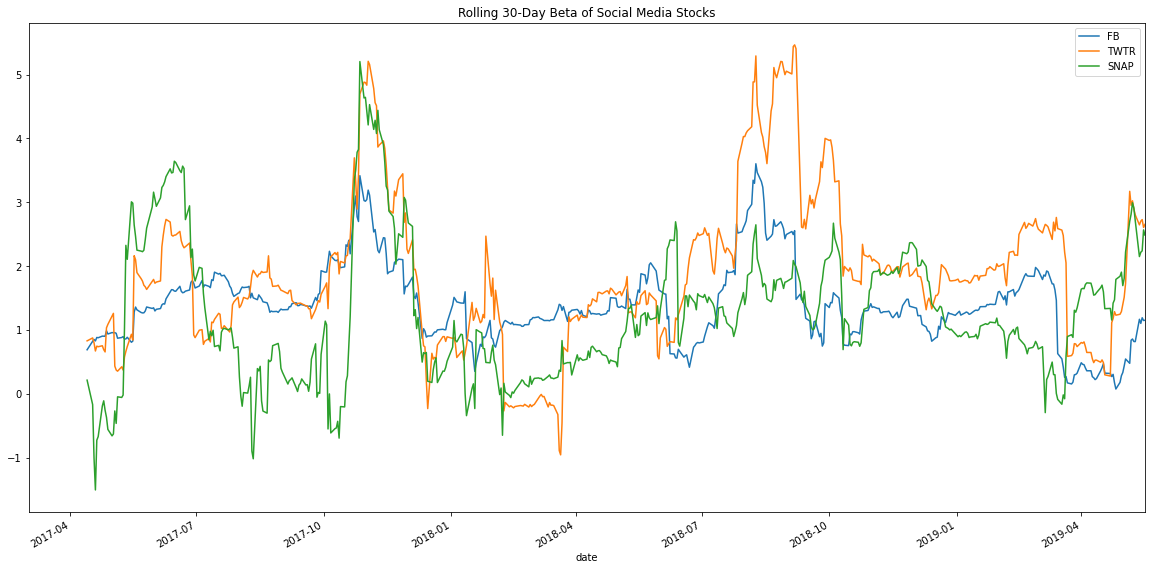

In [10]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_fb_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Social Media Stocks')
rolling_twtr_beta.plot(ax=ax)
rolling_snap_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["FB", "TWTR", "SNAP"])